In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics,preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from imblearn.under_sampling import RandomUnderSampler
from pydotplus import graph_from_dot_data
from IPython.display import Image

1. Using the Scikit-Learn Library train the Decision Tree Classifier to the attached PhishingVsBenignURL data set using all of the features at once. (Dataset is originally from here: https://www.unb.ca/cic/datasets/url-2016.html )

In [2]:
seed = 1
target_index = ['benign','phishing']
data = pd.read_csv('DataSetForPhishingVSBenignUrl.csv')
data = data[data.URL_Type_obf_Type.isin(target_index)].dropna().reset_index(drop=True)
rus = RandomUnderSampler(random_state=seed) # random balance sample function
standard = preprocessing.StandardScaler() # standardize data func
X,y = rus.fit_resample(standard.fit_transform(data[data.columns[:-1]].values),
                       data[data.columns[-1]].values)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=seed,stratify=y)
print("Total training phishing {} samples\nTotal training benign {} samples".format(
                np.sum(y_train == 'phishing'),np.sum(y_train == 'benign')))
print("Total test phishing {} samples\nTotal test benign {} samples".format(
                np.sum(y_test == 'phishing'),np.sum(y_test == 'benign')))

Total training phishing 1896 samples
Total training benign 1896 samples
Total test phishing 813 samples
Total test benign 813 samples


In [3]:
tree_models = [[],[]]
accuracies = [[],[]]
criterion = ['gini', 'entropy']
for j,c in enumerate(criterion):
    for i in range(1,7):
        tree_models[j].append(DecisionTreeClassifier(criterion=c,max_depth=i,random_state=seed))
        tree_models[j][i-1].fit(X_train, y_train)
        accuracies[j].append(np.round(tree_models[j][i-1].score(X_test,y_test)*100,2))
        print("="*80)
        print(f"{c} impurity max tree depth {i} accuracy: {accuracies[j][i-1]}%")
print("="*80)
# x = np.arange(0,8)
# yticks = np.arange(80,96,1)
# plt.rcParams.update({'font.size':20})
# fig,ax = plt.subplots(figsize=(8,8))
# ax.plot(x[1:7],accuracies[0],marker='*',label=criterion[0])
# ax.plot(x[1:7],accuracies[1],marker='X',label=criterion[1])
# ax.set(yticks=yticks,yticklabels=yticks,xlabel='Tree depth',ylabel='Accuracy (%)')
# ax.grid(True)
# ax.legend()
# plt.show()

gini impurity max tree depth 1 accuracy: 80.69%
gini impurity max tree depth 2 accuracy: 87.39%
gini impurity max tree depth 3 accuracy: 90.84%
gini impurity max tree depth 4 accuracy: 92.25%
gini impurity max tree depth 5 accuracy: 93.67%
gini impurity max tree depth 6 accuracy: 94.59%
entropy impurity max tree depth 1 accuracy: 80.69%
entropy impurity max tree depth 2 accuracy: 87.39%
entropy impurity max tree depth 3 accuracy: 90.34%
entropy impurity max tree depth 4 accuracy: 92.37%
entropy impurity max tree depth 5 accuracy: 93.67%
entropy impurity max tree depth 6 accuracy: 93.91%


### 2. Run the model for trees of depth 1, 2, 3, 4, 5, and 6 and for the Gini Impurity and Entropy impurity measures for each tree depth. Compare the results of these 12 cases and discuss your results.

#### As shown in the accuracy and figure above. By comparing the decision tree between gini and entropy impurity measures, when the tree depth of 1, 2 and 5 both impurity measures are exactly the same. The tree with depth of 3 and 4, both are not considered to be different because the accuracy different is only +/-0.5%. Which is not significantly different. Similarly, both impurity measures tree depth of 6 are still not considered to be different because they are no significantly different between two measures.

The highest accuracy with depth 2


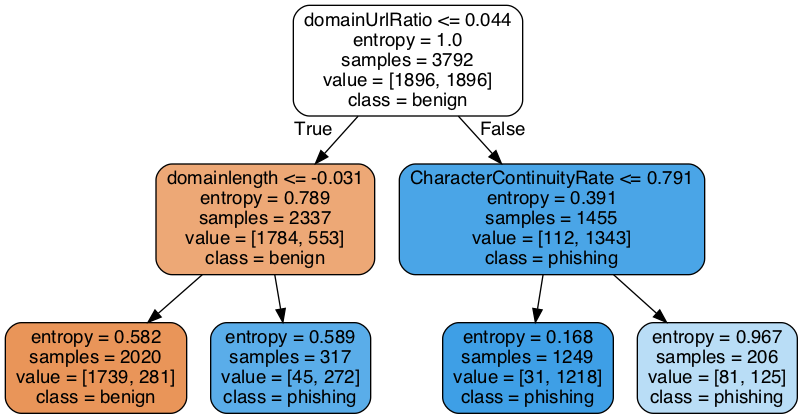

In [4]:
print('The highest accuracy with depth 2')
dot_data = export_graphviz(tree_models[1][1],filled=True, rounded=True,
                          class_names= target_index,
                          feature_names=data.columns[:-1],out_file=None) 
graph = graph_from_dot_data(dot_data)
graph.write_png('best_depth2.png')
Image('best_depth2.png', height=600, width=600)

The highest accuracy with depth 2


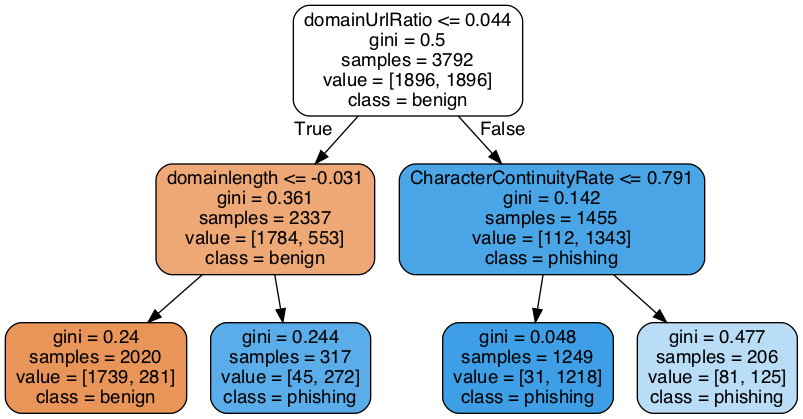

In [5]:
print('The highest accuracy with depth 2')
dot_data = export_graphviz(tree_models[0][1],filled=True, rounded=True,
                          class_names= target_index,
                          feature_names=data.columns[:-1],out_file=None) 
graph = graph_from_dot_data(dot_data)
graph.write_png('best_depth2.png')
Image('best_depth2.png', height=600, width=600)

The highest accuracy with depth 6, gini


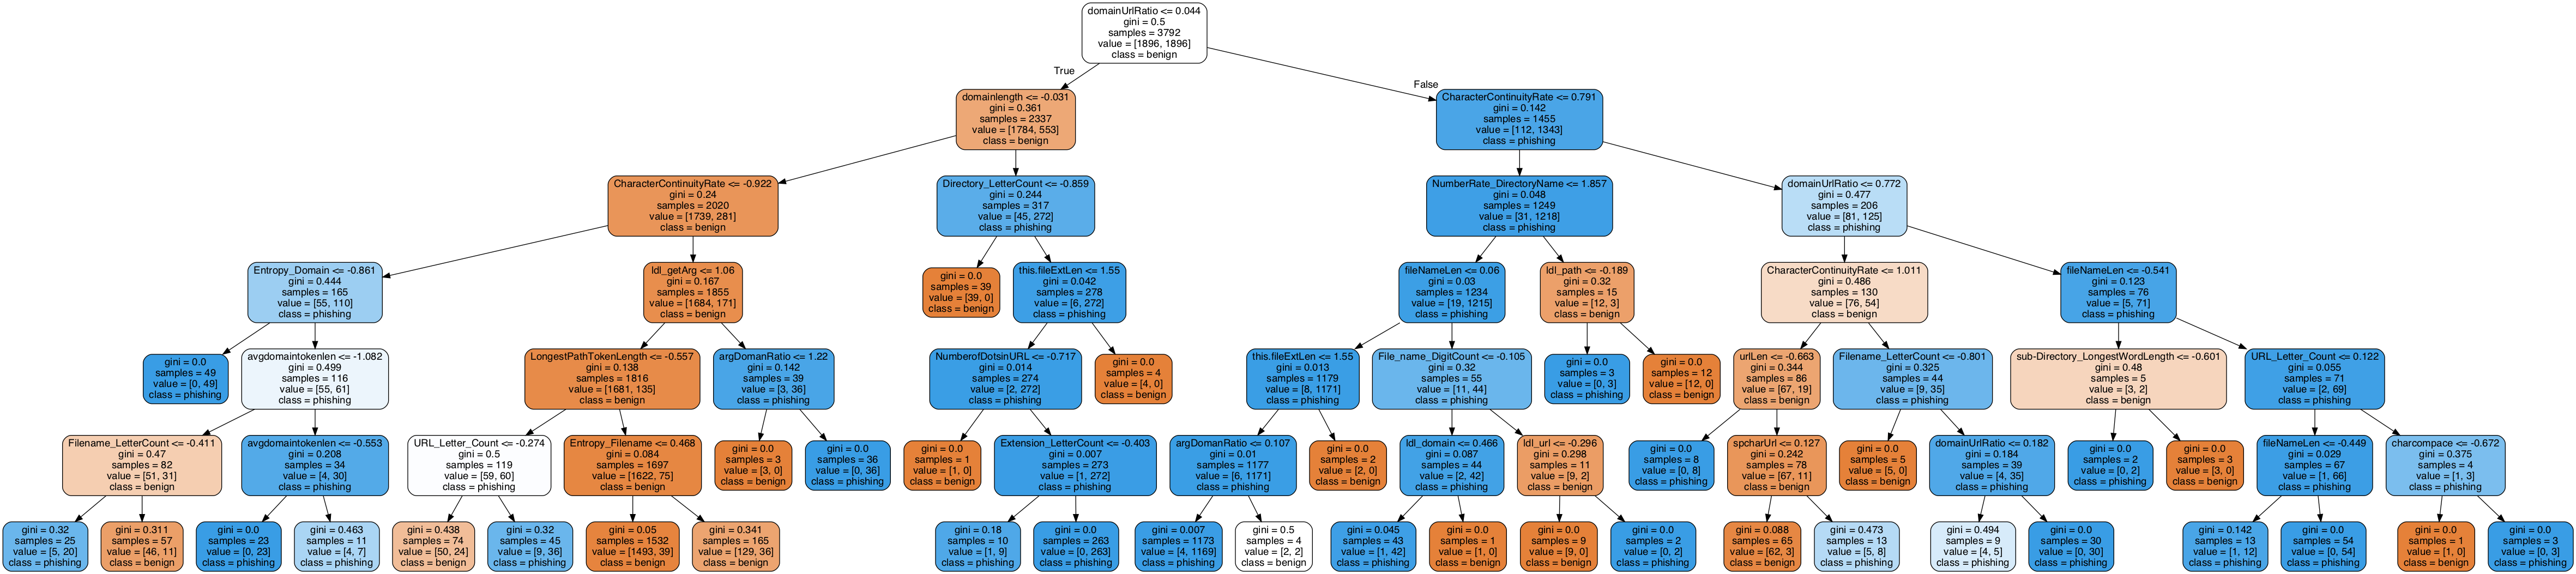

In [6]:
print('The highest accuracy with depth 6, gini')
dot_data = export_graphviz(tree_models[0][5],filled=True, rounded=True,
                          class_names= target_index,
                          feature_names=data.columns[:-1],out_file=None) 
graph = graph_from_dot_data(dot_data)
graph.write_png('gini.png')
Image('gini.png', height=1000, width=1000)

### 3. Take the best performing tree of depth 2 from above. Visualize the tree and discuss your observations. (For visualizing decision trees see: https://www.kaggle.com/willkoehrsen/visualize-a-decision-tree-w-python-scikit-learn)
#### As shown from the decision trees above, when max_depth = 2, both gini and entropy impurity measures are exactly the same with a complete tree. Since we use all (79) features, we also expect to have a complete tree. In addition, we have used all features, the splitting classes should be the same for tree depth of 2. However, the highest accuracy with depth of 6 is different, some of the decision has stop earlier because it reach up to its leave, i.e. the most left subtree, it only goes down to level 4 but other than that goes either the same or level 5 even level 6. Which is the last level. Lastly, 79 features with tree depth of 6 performance is very high accuracy with testing data, that is unusual. One reason may be some features are redundant or other reason the dataset has been preprocessed well.